In [1]:
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
!unzip -q traffic-signs-data.zip

--2021-06-17 12:01:15--  https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.226.39.136, 13.226.39.80, 13.226.39.65, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.226.39.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip.1’

traffic-signs-data. 100%[===================>] 117.80M  44.2MB/s    in 2.7s    

2021-06-17 12:01:18 (44.2 MB/s) - ‘traffic-signs-data.zip.1’ saved [123524425/123524425]

replace test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
train_link = "train.p"
valid_link = "valid.p"
test_link = "test.p"

In [3]:
!rm traffic-signs-data.zip.1 

In [5]:
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [6]:
with open(train_link, mode = 'rb') as f:
  train = pickle.load(f)
with open(test_link, mode = 'rb') as f:
  test = pickle.load(f)
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [7]:
trainX = train['features']
trainY = train['labels']

41


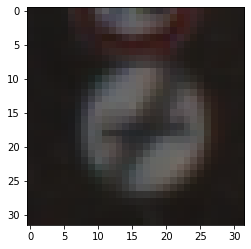

In [8]:
print(trainY[0])

plt.imshow(trainX[0])

In [7]:
train['coords'][2]

array([ 5,  6, 22, 23], dtype=uint8)

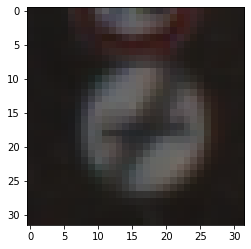

In [ ]:
plt.imshow(trainX[0])
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [9]:
trainX, trainY = shuffle(trainX, trainY)

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [11]:
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [14]:
num_classes = 43

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size=(2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu',kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu',kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation="softmax"))                                  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [16]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, 
                         width_shift_range=0.2, height_shift_range=0.2, 
                         horizontal_flip=True)

In [17]:
learning_rate = 0.001
epochs = 40
batch_size = 128

In [18]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

271/271 [==============================] - 19s 70ms/step - loss: 0.9073 - accuracy: 0.9221 - val_loss: 1.0964 - val_accuracy: 0.8612
Epoch 31/40
271/271 [==============================] - 19s 71ms/step - loss: 0.8525 - accuracy: 0.9265 - val_loss: 0.9453 - val_accuracy: 0.8794
Epoch 32/40
271/271 [==============================] - 19s 70ms/step - loss: 0.8052 - accuracy: 0.9307 - val_loss: 1.0079 - val_accuracy: 0.8649
Epoch 33/40
271/271 [==============================] - 20s 73ms/step - loss: 0.7603 - accuracy: 0.9324 - val_loss: 0.8838 - val_accuracy: 0.8905
Epoch 34/40
271/271 [==============================] - 19s 70ms/step - loss: 0.7235 - accuracy: 0.9346 - val_loss: 0.7935 - val_accuracy: 0.8937
Epoch 35/40
271/271 [==============================] - 19s 70ms/step - loss: 0.6839 - accuracy: 0.9378 - val_loss: 0.9393 - val_accuracy: 0.8562
Epoch 36/40
271/271 [==============================] - 19s 70ms/step - loss: 0.6482 - accuracy: 0.9425 - val_loss: 0.7762 - val_accuracy: 0.89

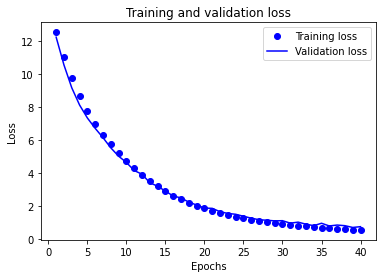

In [19]:
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

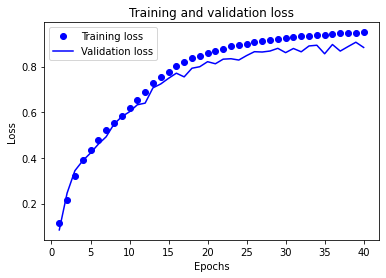

In [20]:
loss = H.history['accuracy']
val_loss = H.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
model.evaluate(testX, lb.fit_transform(testY))

395/395 [==============================] - 2s 5ms/step - loss: 0.7504 - accuracy: 0.8966


[0.75042325258255, 0.8965954184532166]

In [ ]:
model.save('./model_TrafficSign.h5')


In [ ]:
import tensorflow as tf
saved_model = tf.keras.models.load_model('./model_TrafficSign.h5')


In [ ]:
result = saved_model.predict(testX[10:11])

In [ ]:
import numpy as np

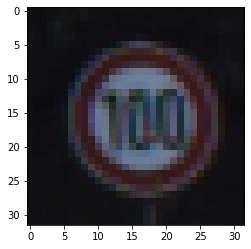

In [ ]:
final = np.argmax(result)
bienbao=classNames[final]
plt.imshow(testX[11])